## Text processing library 
## TO DO's
- NLTK
- RE
- Counter
- Porter streamer
- Wordnet
- Spell Checker
- Word Cloud
- Spacy

- Convert text to lowerCase
- remove punctuations
- Count frequency of all words
- split on whitespaces 
- Remove stop words
- counter for words and remove 10 most frequent words
- identify rare words remove them too
- use porterstemmer to convert words to base form (snowball stemmer translate)
- wordnet database of all words
- corpus used to lematize
- remove emoji or convert them to text
- remove emoticons using re :),X( or replace with sentences
- remove url's,html tags
- substitute chat words AFIK IMO BRB or remove
- apply spellchecker
- wordcloud plot
- weget 

## Basic Idea
    read_dataset
    lower,punctuation
    stopwords
    remove emoji
    remove url,html tags
    chat words
    spellchecker
    word count ,remove extreme
    porterstemmer
    lematise
    wordcloud
## basic structure
# GLOBAL VARIABLES

# Functions
def read_dataset(path,type,lower_type="python",emoji_type="remove",html_url_type="re",stop_word_type="NLTK",spellchecker_type="pyspellchecker"):
    if type=="text":
        data=read_txt(path)
    else if type=="JSON":
        data=read_json(path)
    #.....
    data=lowercase(data,lower_type)
    data=remove_punctuations(data)
    data=remove_emoji(data,emoji_type)
    data=remove_URLnHTML_tags(data,html_url_type)
    data=tokenise(data,type="")
    data=remove_stop_words(data,stop_word_type)
    data=spellchecker(data,spellchecker_type)
    # return cleaned data consicting of words only
    return data

def word_processing(data,remove_top=10,remove_bottom=10,lematize_type="NLTK",visualise_type="wordcloud"):
    data,wordcount=count_remove(data,remove_top,remove_bottom)
    data=porter_stemmer(data)
    data=lematise(data,type=lematize_type)
    visualise(data,type=visualise_type)
    

In [1]:
## Kagle link for dataset download and move to your working directory
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Jamin Carter\.cache\kagglehub\datasets\rmisra\news-headlines-dataset-for-sarcasm-detection\versions\2


In [ ]:
# ==============================================================================
# 1. IMPORTS
# ==============================================================================
import re
import pandas as pd
import nltk
from collections import Counter
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from spellchecker import SpellChecker
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ====================
# 2. ONE-TIME SETUP
# ====================
# pip install pandas nltk pyspellchecker wordcloud matplotlib beautifulsoup4
# python -c "import nltk; nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet')"

# ===========================================
# 3. HELPER FUNCTIONS WITH SELECTABLE TYPES
# ===========================================

def lowercase(text, lower_type="python"):
    print("starting lowercase")# lower_type can be ['python']
    if lower_type == "python":
        return text.lower()
    else:
        print(f"lowercase type '{lower_type}' not implemented.")
        return text

def remove_html_tags(text, remove_type="re"): # remove_type can be ['re', 'beautifulsoup']
    print("starting remove_html_tags")
    if remove_type == 're':
        removed = re.findall(r'<.*?>', text)
        print(f"Removed {len(removed)} HTML tags.")
        return re.sub(r'<.*?>', '', text)
    elif remove_type == 'beautifulsoup':
        soup = BeautifulSoup(text, "html.parser")
        #removed = len(soup.find_all()) #does not work
        #print(f"Removed {removed} HTML tags using BeautifulSoup.")
        return soup.get_text()
    else:
        print(f"remove_html_tags type '{remove_type}' not implemented.")
        return text

def remove_punctuation_preserving_urls(text, remove_type="re"): # remove_type can be ['re']
    print("starting remove_punctuation_preserving_urls")
    if remove_type == 're':
        pattern = r'[^\w\s.:/]'
        removed = re.findall(pattern, text)
        print(f"Removed {len(removed)} punctuation characters.")
        return re.sub(pattern, ' ', text)
    else:
        print(f"remove_punctuation type '{remove_type}' not implemented.")
        return text

def remove_urls(text):
    print("starting remove_urls")
    removed = re.findall(r'https?://\S+|www\.\S+', text)
    print(f"Removed {len(removed)} URLs.")
    return re.sub(r'https?://\S+|www\.\S+', '', text)

def tokenize_text(text, library="nltk"): # library can be ['nltk']
    print("starting tokenize_text")
    if library == "nltk":
        return nltk.word_tokenize(text)
    else:
        print(f"tokenize library '{library}' not implemented.")
        return None

def remove_stopwords(tokens, library="nltk"): # library can be ['nltk']
    print("starting remove_stopwords")
    if library == "nltk":
        stop_words = set(stopwords.words('english'))
        filtered = [token for token in tokens if token.lower() not in stop_words]
        print(f"Removed {len(tokens) - len(filtered)} stopwords.")
        return filtered
    else:
        print(f"remove_stopwords library '{library}' not implemented.")
        return None

CHAT_WORDS_MAPPING = {
    "omg": "oh my god",
    "lol": "laughing out loud",
    "brb": "be right back",
    "btw": "by the way",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "afaik": "as far as i know",
    "ttyl": "talk to you later"
}

def substitute_chat_words(tokens):
    # Using .get(token, token) looks up the token in the mapping.
    # If it's not found, it returns the original token.
    substituted_tokens = []
    substitutions = 0
    for token in tokens:
        if token in CHAT_WORDS_MAPPING:
            substitutions += 1
        substituted_tokens.append(CHAT_WORDS_MAPPING.get(token, token))
    print(f"Substituted {substitutions} chat words.")
    return substituted_tokens

def correct_spelling(tokens, library="pyspellchecker"): # library can be ['pyspellchecker']
    print("starting correct_spelling")
    if library == "pyspellchecker":
        spell = SpellChecker()
        misspelled = spell.unknown(tokens)
        return [spell.correction(word) if word in misspelled else word for word in tokens]
    else:
        print(f"correct_spelling library '{library}' not implemented.")
        return None

def stem_tokens(tokens, stemmer_type="porter"): # stemmer_type can be ['porter']
    print("starting stem_tokens")
    if stemmer_type == "porter":
        stemmer = PorterStemmer()
        return [stemmer.stem(token) for token in tokens]
    else:
        print(f"stemmer_type '{stemmer_type}' not implemented.")
        return None

def lemmatize_tokens(tokens, library="nltk"): # library can be ['nltk']
    print("starting lemmatize_tokens")
    if library == "nltk":
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(token) for token in tokens]
    else:
        print(f"lemmatize library '{library}' not implemented.")
        return None

def count_and_filter(tokens, top_n=10, remove_rare=True):
    print("starting count_and_filter")
    word_counts = Counter(tokens)
    to_remove = set()
    for word, count in word_counts.most_common(top_n):
        to_remove.add(word)
    if remove_rare:
        for word, count in word_counts.items():
            if count == 1:
                to_remove.add(word)
    filtered_tokens = [token for token in tokens if token not in to_remove]
    print(f"Removed {len(to_remove)} frequent/rare words.")
    return filtered_tokens, word_counts

def display_word_cloud(word_counts):
    print("starting display_word_cloud")
    if not word_counts:
        print("Cannot generate word cloud from empty data.")
        return
    wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# ===============================
# 4. MAIN FUNCTIONS 
# ===============================
import pandas as pd

def read_dataset(path, file_type="json", json_fields=[]):
    """
    Reads data from a file and returns the content as a single string.
    """
    if file_type == "json":
        data = pd.read_json(path, lines=True)
        if len(json_fields) == 0:
            # Process all columns if no specific fields are given
            content = ' '.join([' '.join(data[col].dropna().astype(str)) for col in data.columns])
        else:
            # Process only the specified fields
            content = ""
            for item in json_fields:
                content += ' '.join(data[item].dropna().astype(str)) + ' '
        return content.strip()

    elif file_type == "txt":
        try:
            with open(path, 'r', encoding='utf-8') as file:
                content = file.read()
            return content
        except FileNotFoundError:
            print(f"Error: The file was not found at {path}")
            return None

    else:
        print(f"File type '{file_type}' is not supported.")
        return None

def clean_and_tokenize(text_data, html_remove_type='re', punct_remove_type='re', tokenize_lib='nltk', stopword_lib='nltk', spellcheck_lib='pyspellchecker'):
    """Starts the cleaning pipeline with selectable methods."""
    text = lowercase(text_data)
    text = remove_html_tags(text, remove_type=html_remove_type)
    text = remove_punctuation_preserving_urls(text, remove_type=punct_remove_type)
    text = remove_urls(text)
    
    tokens = tokenize_text(text, library=tokenize_lib)
    tokens = remove_stopwords(tokens, library=stopword_lib)
    tokens=substitute_chat_words(tokens)
    # tokens = correct_spelling(tokens, library=spellcheck_lib) # disabled as it takes too much time
    
    return tokens

def normalize_and_visualize(tokens, normalization_method="lemmatize", top_to_remove=5):
    """Orchestrates normalization and visualization with selectable methods."""
    filtered_tokens, word_counts = count_and_filter(tokens, top_n=top_to_remove, remove_rare=True)
    
    if normalization_method == "stem":
        normalized_tokens = stem_tokens(filtered_tokens, stemmer_type="porter")
    elif normalization_method == "lemmatize":
        normalized_tokens = lemmatize_tokens(filtered_tokens, library="nltk")
    else:
        normalized_tokens = filtered_tokens
    
    final_counts = Counter(normalized_tokens)
    display_word_cloud(final_counts)
    
    return normalized_tokens


Successfully read data. Total character length: 1653569
--------------------
Starting cleaning and tokenization...
starting lowercase
starting remove_html_tags
Removed 0 HTML tags using BeautifulSoup.
starting remove_punctuation_preserving_urls
Removed 25210 punctuation characters.
starting remove_urls
Removed 0 URLs.
starting tokenize_text
starting remove_stopwords
Removed 81844 stopwords.
Substituted 7 chat words.
Tokenization complete. Found 195084 tokens.
--------------------
Starting normalization and visualization...
starting count_and_filter
Removed 11265 frequent/rare words.
starting lemmatize_tokens
starting display_word_cloud


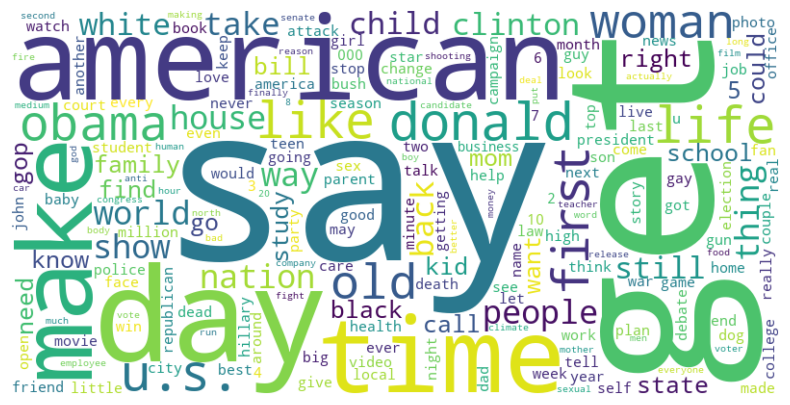


Pipeline complete. Word cloud has been generated.
Sample of final normalized tokens:
['former', 'store', 'clerk', 'sue', 'secret', 'black', 'code', 'minority', 'shopper', 'roseanne', 'revival', 'catch', 'thorny', 'political', 'mood', 'better', 'worse', 'mom', 'starting', 'fear']


In [ ]:
# ===========================
# EXECUTION BLOCK
# ===========================

GLOBAL_FILE_PATH = "v0.3_Sarcasm_Headlines_Dataset.json"

if __name__ == "__main__":
    # --- Step 1: Read Data ---
    all_headlines_text = read_dataset(
        path=GLOBAL_FILE_PATH,
        file_type="json",
        json_fields=['headline']
    )

    if all_headlines_text:
        print(f"Successfully read data. Total character length: {len(all_headlines_text)}")
        print("-" * 20)

        # --- Step 2: Clean and Tokenize Data ---
        print("Starting cleaning and tokenization...")
        cleaned_tokens = clean_and_tokenize(all_headlines_text,html_remove_type='beautifulsoup')
        print(f"Tokenization complete. Found {len(cleaned_tokens)} tokens.")
        print("-" * 20)

        # --- Step 3: Normalize and Visualize Data ---
        print("Starting normalization and visualization...")
        final_tokens = normalize_and_visualize(
            cleaned_tokens,
            normalization_method="lemmatize",
            top_to_remove=10  # Remove the 10 most frequent words
        )
        
        print("\nPipeline complete. Word cloud has been generated.")
        print("Sample of final normalized tokens:")
        print(final_tokens[:20]) # Print the first 20 final tokens
    else:
        print("Failed to read data from the file.")


In [4]:
final_counts

NameError: name 'final_counts' is not defined